## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/raw.csv')

#### Show Top 5 Records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [5]:
X = df.drop(columns=['math_score'],axis=1)

In [6]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
print("Categories in 'gender' variable:",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [8]:
y = df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [9]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [10]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [11]:
X = preprocessor.fit_transform(X)

In [12]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [14]:
SVR(kernel='rbf', C=1.0, epsilon=0.1)

SVR()

In [142]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    # "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    'support_vector' : SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3243
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
-----------------------

- HyperParameter Tuning 

In [50]:
paramgrid = {
    'colsample_bylevel':[0.3,0.5,0.7,0.8],
    'max_depth' : [2,3,4,5,8,10,15],
    'learning_rate':[.1,.01,.05],
    'n_estimators': [5,8,16,32,64]
}

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
hyperparam = GridSearchCV(estimator=XGBRegressor(),n_jobs=-1,return_train_score=True,
                        param_grid=paramgrid)

In [46]:
hyperparam.fit(X_train,y_train)

c:\Users\Aniket\miniconda3\envs\venv\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.3, 0.5, 0.7, 0.8],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [2, 3, 4, 5, 8, 10, 15],
                         'n_estimators': [5, 8, 16, 32, 64]},
             return_train_score=True)

In [47]:
y_test_pred_xgb = hyperparam.predict(X_test)

In [48]:
evaluate_model(y_test,y_test_pred_xgb)

(4.300768852233887, 5.6329021016902905, 0.869607150554657)

In [49]:
hyperparam.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.7, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=64, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Results

In [28]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880345
5,Random Forest Regressor,0.851207
7,AdaBoost Regressor,0.851140
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.718787


#### Ridge Regression 
- It came out to be the best model out of all as it curbs the multicollinearity 
- Trying for different values  of `alpha`

In [161]:
for alpha in [0.1,0.5,1,5,6,7,10]:
    lin_model = Ridge(fit_intercept=True,alpha=alpha)
    lin_model = lin_model.fit(X_train, y_train)
    y_pred = lin_model.predict(X_test)
    score = r2_score(y_test, y_pred)*100
    print(f"Accuracy of the model for alpha = {alpha} is %.2f" %score)

# Choosing alpha as 5
lin_model = Ridge(fit_intercept=True,alpha=5)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100

Accuracy of the model for alpha = 0.1 is 88.05
Accuracy of the model for alpha = 0.5 is 88.05
Accuracy of the model for alpha = 1 is 88.06
Accuracy of the model for alpha = 5 is 88.09
Accuracy of the model for alpha = 6 is 88.09
Accuracy of the model for alpha = 7 is 88.09
Accuracy of the model for alpha = 10 is 88.08


#### Let's do some verification of data for Linear Regression

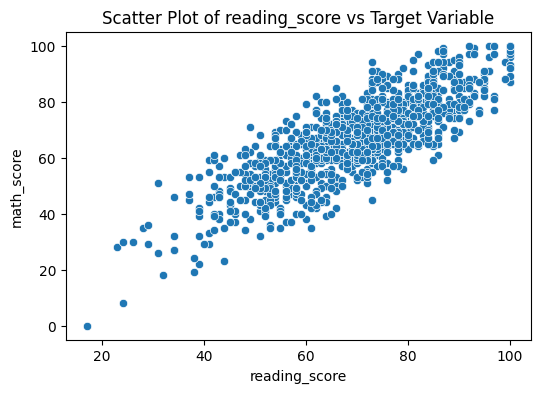

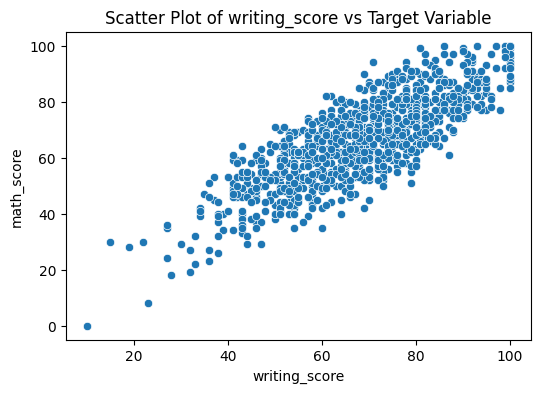

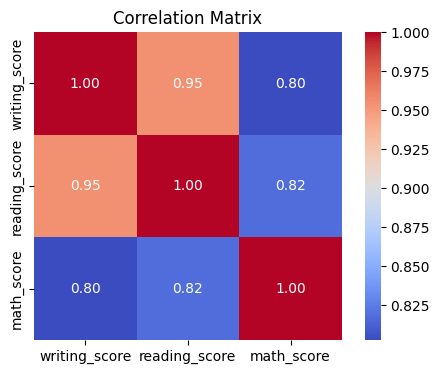

In [178]:
# Scatter Plot & Correlation Plot between math_score & num variables
for num in num_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=num, y='math_score', data=df)
    plt.title(f'Scatter Plot of {num} vs Target Variable')
    plt.show()

correlation_matrix = df[['writing_score','reading_score','math_score']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

- Independence of categorical features

In [192]:
from scipy.stats import chi2_contingency

for i in cat_features:
    for j in cat_features:
        if i != j : 
            contingency_table = pd.crosstab(df[i], df[j])
            chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
            if p_value < 0.05 :
                print(f'Features {i} and {j} are not independent.') 
            else:
                print(f'Features {i} and {j} are independent.') 

Features gender and race_ethnicity are independent.
Features gender and parental_level_of_education are independent.
Features gender and lunch are independent.
Features race_ethnicity and gender are independent.
Features race_ethnicity and parental_level_of_education are independent.
Features race_ethnicity and lunch are independent.
Features parental_level_of_education and gender are independent.
Features parental_level_of_education and race_ethnicity are independent.
Features parental_level_of_education and lunch are independent.
Features lunch and gender are independent.
Features lunch and race_ethnicity are independent.
Features lunch and parental_level_of_education are independent.


- Indicates of Some Multicollinearity between numerical varibles which is taken care of by Ridge Regression

In [174]:
from scipy.stats import f_oneway

for cat in cat_features:
    groups = [df[df[cat] == category]['math_score'] for category in df[cat].unique()]
    f_stat, p_value = f_oneway(*groups)
    print(f'ANOVA for {cat}: F-statistic = {f_stat}, p-value = {p_value}')

ANOVA for gender: F-statistic = 28.979336095030888, p-value = 9.120185549332254e-08
ANOVA for race_ethnicity: F-statistic = 14.593885166332637, p-value = 1.3732194030370688e-11
ANOVA for parental_level_of_education: F-statistic = 6.521582600453217, p-value = 5.592272384107223e-06
ANOVA for lunch: F-statistic = 140.11884154835118, p-value = 2.4131955993147374e-30
ANOVA for test_preparation_course: F-statistic = 32.54264846908886, p-value = 1.5359134607155386e-08


- Since for every categorical feature, the p-values is very less, indicating the rejection of Null Hypothesis and categorical features having significant impact on math_score.

### Now, we will test the assumptions of Linear Regresssion Model.
1 - Linearity 

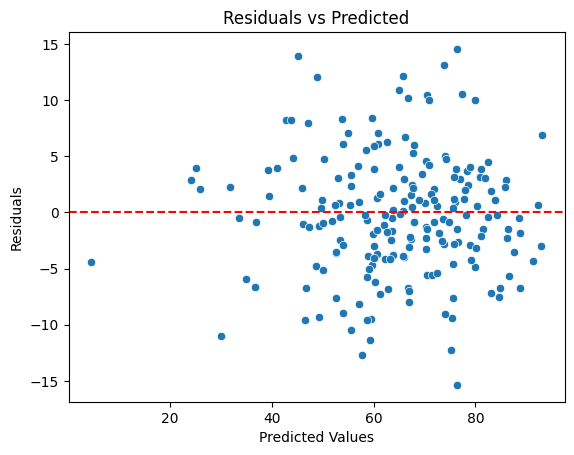

In [162]:
# Plotting residuals
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

- Conclusion : Since there is no special pattern observed in the above plot, we can say that the data is linear

2 - Homoscedasticity (Variance(errors) = constant) : Breusch Pagan Test
- $H_{o}$ : Homoscedasticity
- $H_{1}$ : Heteroscedastic

In [163]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Add a constant to X_train for statsmodels
X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const).fit()

# Breusch-Pagan test
test_result = het_breuschpagan(ols_model.resid, X_train_const)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
val = dict(zip(labels, test_result))

if val['p-value'] < 0.05 :
    print('we reject $H_{o}$, thus data is heteroscedastic')
else:
    print(f'With pvalue = {round(val['p-value'],3)}, we fail to reject null hypothesis, thus data is homoscedastic')

With pvalue = 0.538, we fail to reject null hypothesis, thus data is homoscedastic


3 - Errors should be normally distributed
- Test 1 : Histogram with kde & Q-Q Plot 

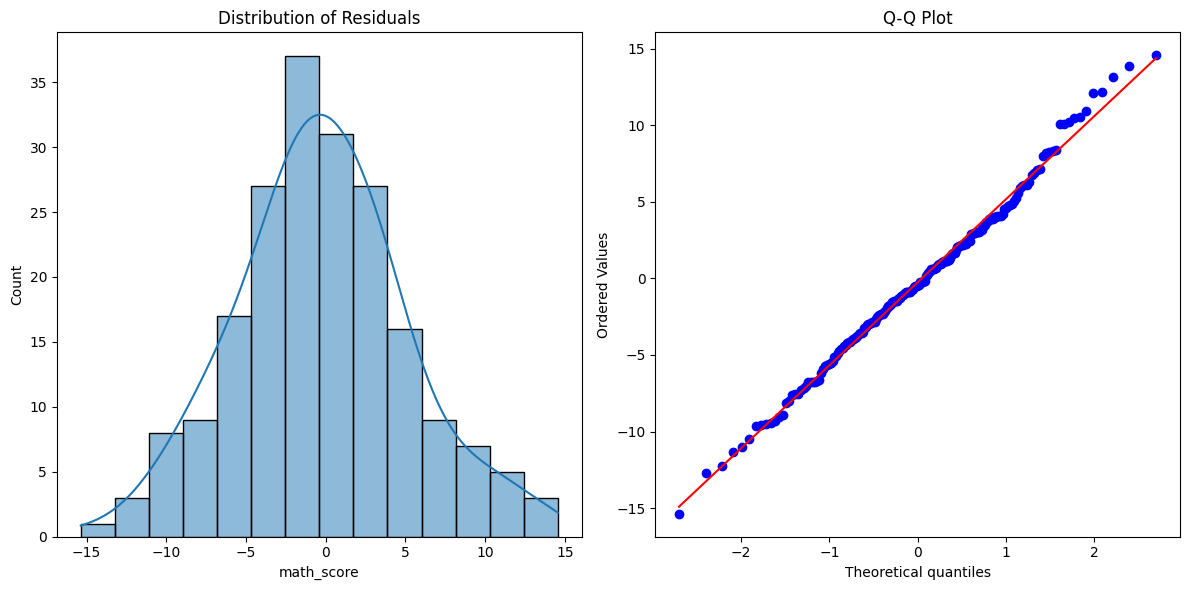

In [164]:
import scipy.stats as stats

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(residuals, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Residuals')

stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot')

plt.tight_layout()
plt.show()

- Test 2 : Tests for Normality 

In [165]:
from scipy.stats import kstest, anderson, shapiro

# 1. Kolmogorov-Smirnov (KS) Test
kstest_result = kstest(residuals, 'norm')
print("Kolmogorov-Smirnov (KS) Test:")
print(f"Statistic: {kstest_result[0]:.4f}, p-value: {kstest_result[1]:.4e}")

if kstest_result[1] < 0.05:
    print(f"Conclusion: Since p-value = {kstest_result[1]:.4e} is < 0.05, we reject the null hypothesis.\nResiduals do NOT follow a normal distribution.\n")
else:
    print(f"Conclusion: Since p-value = {kstest_result[1]:.4e} is >= 0.05, we fail to reject the null hypothesis.\nResiduals follow a normal distribution.\n")

# 2. Anderson-Darling Test
result = anderson(residuals, dist='norm')
print("Anderson-Darling Test:")
print(f"Anderson-Darling Test Statistic: {result.statistic:.4f}")
print("Critical Values:")

# Checking against critical values at various significance levels
for i in range(len(result.critical_values)):

    significance_level = result.significance_level[i]
    if significance_level == 5.0 or significance_level == 10.0:
        critical_value = result.critical_values[i]
        if result.statistic < critical_value:
            print(f"At {significance_level}% significance level, we cannot reject the null hypothesis (Residuals are normal).")
        else:
            print(f"At {significance_level}% significance level, we reject the null hypothesis (Residuals are not normal).")

# Conclusion for Anderson-Darling Test
if result.statistic < result.critical_values[2]:  # At 5% significance level
    print("\nConclusion: Based on the Anderson-Darling test,\nresiduals follow a normal distribution at the 5% significance level.\n")
else:
    print("\nConclusion: Based on the Anderson-Darling test,\nresiduals do NOT follow a normal distribution at the 5% significance level.\n")

# 3. Shapiro-Wilk Test
shapiro_test = shapiro(residuals)
print("Shapiro-Wilk Test:")
print(f"Statistic: {shapiro_test[0]:.4f}, p-value: {shapiro_test[1]:.4e}")

if shapiro_test[1] < 0.05:
    print(f"Conclusion: Since p-value = {shapiro_test[1]:.4e} is < 0.05, we reject the null hypothesis.\nResiduals do NOT follow a normal distribution.\n")
else:
    print(f"Conclusion: Since p-value = {shapiro_test[1]:.4e} is >= 0.05, we fail to reject the null hypothesis.\nResiduals follow a normal distribution.\n")

Kolmogorov-Smirnov (KS) Test:
Statistic: 0.3426, p-value: 1.8422e-21
Conclusion: Since p-value = 1.8422e-21 is < 0.05, we reject the null hypothesis.
Residuals do NOT follow a normal distribution.

Anderson-Darling Test:
Anderson-Darling Test Statistic: 0.3265
Critical Values:
At 10.0% significance level, we cannot reject the null hypothesis (Residuals are normal).
At 5.0% significance level, we cannot reject the null hypothesis (Residuals are normal).

Conclusion: Based on the Anderson-Darling test,
residuals follow a normal distribution at the 5% significance level.

Shapiro-Wilk Test:
Statistic: 0.9944, p-value: 6.5827e-01
Conclusion: Since p-value = 6.5827e-01 is >= 0.05, we fail to reject the null hypothesis.
Residuals follow a normal distribution.



*Note* : Thus with the help of Anderson Darling, Shapiro-Wilk Test, Q-Q Plot and Histogram Plot conclude that erros follow a normal distribution.

In [102]:
from scipy.stats import f_oneway

for cat in cat_features:
    groups = [df[df[cat] == category]['math_score'] for category in df[cat].unique()]
    f_stat, p_value = f_oneway(*groups)
    print(f'ANOVA for {cat}: F-statistic = {f_stat}, p-value = {p_value}')

ANOVA for gender: F-statistic = 28.979336095030888, p-value = 9.120185549332254e-08
ANOVA for race_ethnicity: F-statistic = 14.593885166332637, p-value = 1.3732194030370688e-11
ANOVA for parental_level_of_education: F-statistic = 6.521582600453217, p-value = 5.592272384107223e-06
ANOVA for lunch: F-statistic = 140.11884154835118, p-value = 2.4131955993147374e-30
ANOVA for test_preparation_course: F-statistic = 32.54264846908886, p-value = 1.5359134607155386e-08


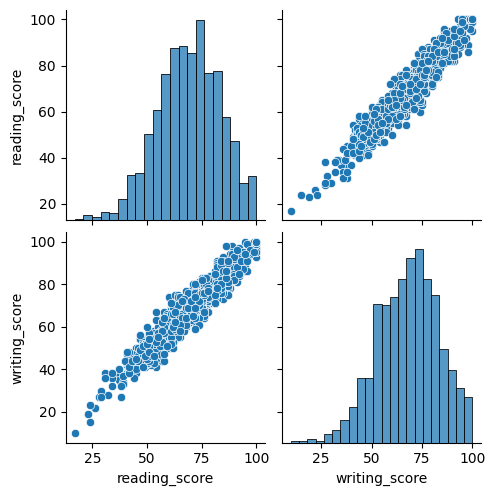

In [123]:
import seaborn as sns

sns.pairplot(df[num_features])
plt.show()

## Plot y_pred and y_test

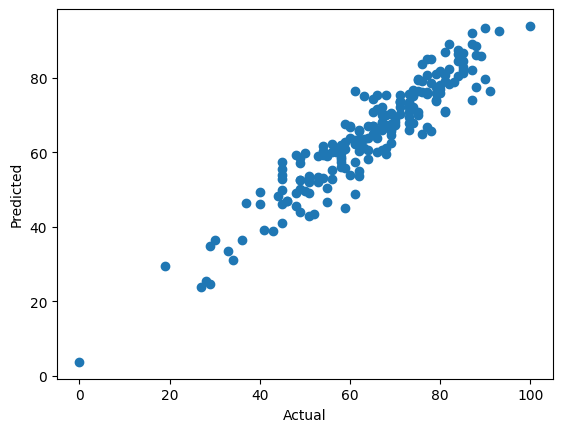

In [21]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

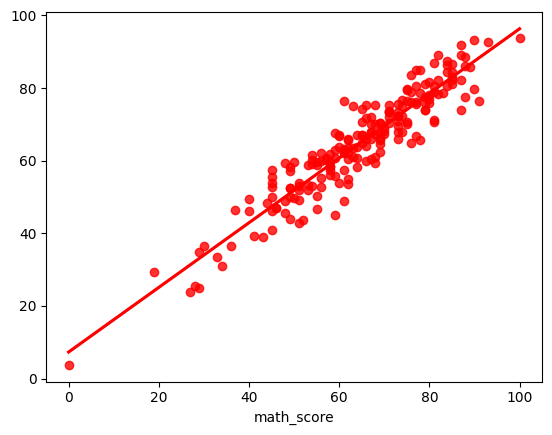

In [22]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [23]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df.sort_values(by='Difference',ascending=False)

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812


#### Reasons for LR outperform XGBoost on Test Data
- Small Dataset
- If there are minimal interactions between features, linear regression might suffice. XGBoost shines in cases with complex interactions, so its performance may lag if your features are mostly independent.
- XGBoost has several hyperparameters that need tuning (e.g., learning rate, maximum depth, number of estimators). If you're using the default settings, it may not be optimized for your specific dataset